In [1]:
import numpy as np
import pandas as pd
import gensim as gs
import matplotlib.pyplot as plt

from collections import Counter

%matplotlib inline

c:\program files\python35\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
color_names = {
    0x000000: 'Black',
    0x000080: 'Navy',
    0x0000FF: 'Blue',
    0x008000: 'Green',
    0x008080: 'Teal',
    0x00FF00: 'Lime',
    0x00FFFF: 'Cyan',
    0x800000: 'Maroon',
    0x800080: 'Purple',
    0x808000: 'Olive',
    0x808080: 'Grey',
    0xC0C0C0: 'Silver',
    0xFF0000: 'Red',
    0xFF00FF: 'Magenta',
    0xFFFF00: 'Yellow',
    0xFFFFFF: 'White'
}

In [3]:
color_dict = gs.corpora.dictionary.Dictionary([color_names.values()])

In [4]:
def get_doc(file_path):
    img = plt.imread(file_path).astype(np.int32)
    colors = (img[:, :, 0] << 16) + (img[:, :, 1] << 8) + img[:, :, 2]
    return {color_names[k]: v for (k, v) in Counter(colors.ravel()).items()}

In [5]:
corpus = []
for i in range(20):
    corpus.append(get_doc('./images/%d.bmp'%i))

In [6]:
for doc in corpus:
    print(doc)

{'Black': 2338, 'Grey': 13964, 'Green': 13059, 'Olive': 4681, 'Teal': 677, 'Silver': 1550, 'White': 31}
{'Black': 12511, 'Grey': 161486, 'Green': 118747, 'Olive': 216448, 'Yellow': 2, 'White': 49, 'Silver': 37957}
{'Black': 4932, 'Grey': 305887, 'Lime': 13287, 'Green': 725063, 'Olive': 605920, 'Yellow': 418, 'Teal': 259, 'White': 577, 'Silver': 107657}
{'White': 6417, 'Black': 18124, 'Grey': 561458, 'Teal': 2, 'Olive': 854203, 'Maroon': 59, 'Silver': 92578, 'Green': 154659}
{'Black': 3617, 'Grey': 15042, 'Teal': 2, 'Olive': 34426, 'Yellow': 97, 'Green': 32069, 'White': 167, 'Silver': 4580}
{'Black': 44092, 'Red': 9540, 'Grey': 50, 'Yellow': 5934, 'Maroon': 96692, 'Olive': 23687, 'Purple': 1, 'White': 3200, 'Silver': 554}
{'Navy': 2, 'Red': 2843452, 'Purple': 90, 'Maroon': 4368842, 'Olive': 198927, 'White': 1525, 'Black': 35523, 'Grey': 4103, 'Teal': 7, 'Silver': 1165, 'Yellow': 840763, 'Green': 1}
{'Black': 47016, 'Red': 76942, 'Grey': 12, 'Maroon': 206953, 'Olive': 78245, 'Yellow': 55

In [7]:
def doc_to_bow(doc):
    bow = []
    for color, count in doc.items():
        bow.append((color_dict.token2id[color], count))
    return bow

bow_docs = [doc_to_bow(doc) for doc in corpus]

In [8]:
for bow in bow_docs:
    print(bow)

[(6, 2338), (1, 13964), (3, 13059), (4, 4681), (12, 677), (5, 1550), (14, 31)]
[(6, 12511), (1, 161486), (3, 118747), (4, 216448), (2, 2), (14, 49), (5, 37957)]
[(6, 4932), (1, 305887), (10, 13287), (3, 725063), (4, 605920), (2, 418), (12, 259), (14, 577), (5, 107657)]
[(14, 6417), (6, 18124), (1, 561458), (12, 2), (4, 854203), (11, 59), (5, 92578), (3, 154659)]
[(6, 3617), (1, 15042), (12, 2), (4, 34426), (2, 97), (3, 32069), (14, 167), (5, 4580)]
[(6, 44092), (9, 9540), (1, 50), (2, 5934), (11, 96692), (4, 23687), (13, 1), (14, 3200), (5, 554)]
[(0, 2), (9, 2843452), (13, 90), (11, 4368842), (4, 198927), (14, 1525), (6, 35523), (1, 4103), (12, 7), (5, 1165), (2, 840763), (3, 1)]
[(6, 47016), (9, 76942), (1, 12), (11, 206953), (4, 78245), (2, 55729), (14, 4660), (5, 843)]
[(6, 2076598), (9, 1089228), (11, 2556796), (4, 5089), (2, 250462), (14, 36906), (5, 921)]
[(6, 142213), (9, 319843), (1, 2325), (2, 240879), (11, 230744), (4, 627104), (13, 5), (14, 14528), (5, 1367)]
[(14, 130782),

In [9]:
pd.DataFrame.from_dict(corpus).fillna(0).astype(np.int32)

,Black,Cyan,Green,Grey,Lime,Maroon,Navy,Olive,Purple,Red,Silver,Teal,White,Yellow
0,2338,0,13059,13964,0,0,0,4681,0,0,1550,677,31,0
1,12511,0,118747,161486,0,0,0,216448,0,0,37957,0,49,2
2,4932,0,725063,305887,13287,0,0,605920,0,0,107657,259,577,418
3,18124,0,154659,561458,0,59,0,854203,0,0,92578,2,6417,0
4,3617,0,32069,15042,0,0,0,34426,0,0,4580,2,167,97
5,44092,0,0,50,0,96692,0,23687,1,9540,554,0,3200,5934
6,35523,0,1,4103,0,4368842,2,198927,90,2843452,1165,7,1525,840763
7,47016,0,0,12,0,206953,0,78245,0,76942,843,0,4660,55729
8,2076598,0,0,0,0,2556796,0,5089,0,1089228,921,0,36906,250462
9,142213,0,0,2325,0,230744,0,627104,5,319843,1367,0,14528,240879


In [10]:
ldamodel = gs.models.ldamodel.LdaModel(bow_docs, num_topics=3, id2word=color_dict,
                                       passes=20, random_state=np.random.RandomState(1234))
print(ldamodel)

LdaModel(num_terms=16, num_topics=3, decay=0.5, chunksize=2000)


In [11]:
topics = ldamodel.print_topics(num_words=20)
for k, distribution in topics:
    print('topic', k)
    print(distribution)

topic 0
0.478*"Maroon" + 0.276*"Red" + 0.150*"Black" + 0.082*"Yellow" + 0.011*"Olive" + 0.003*"White" + 0.000*"Silver" + 0.000*"Purple" + 0.000*"Grey" + 0.000*"Green" + 0.000*"Teal" + 0.000*"Cyan" + 0.000*"Lime" + 0.000*"Navy" + 0.000*"Magenta" + 0.000*"Blue"
topic 1
0.371*"Silver" + 0.307*"Grey" + 0.263*"Teal" + 0.043*"White" + 0.006*"Black" + 0.005*"Navy" + 0.003*"Cyan" + 0.001*"Olive" + 0.001*"Yellow" + 0.000*"Purple" + 0.000*"Maroon" + 0.000*"Green" + 0.000*"Red" + 0.000*"Lime" + 0.000*"Magenta" + 0.000*"Blue"
topic 2
0.528*"Olive" + 0.173*"Green" + 0.152*"Grey" + 0.056*"Yellow" + 0.031*"Silver" + 0.029*"Black" + 0.012*"Cyan" + 0.008*"White" + 0.003*"Navy" + 0.002*"Teal" + 0.002*"Maroon" + 0.002*"Lime" + 0.001*"Red" + 0.000*"Purple" + 0.000*"Magenta" + 0.000*"Blue"


In [12]:
color_list = [color_dict.id2token[i] for i in range(len(color_dict))]
pd.DataFrame(ldamodel.get_topics(), columns=color_list).T

,0,1,2
Navy,2.221636e-08,5.409782e-03,3.404447e-03
Grey,4.905044e-06,3.072544e-01,1.521957e-01
Yellow,8.221807e-02,6.545577e-04,5.571412e-02
Green,3.926789e-06,7.843734e-05,1.732911e-01
Olive,1.118310e-02,1.186880e-03,5.280056e-01
Silver,8.256374e-05,3.709173e-01,3.076326e-02
Black,1.496498e-01,5.628306e-03,2.895282e-02
Magenta,2.120107e-08,4.534698e-08,4.353988e-08
Blue,2.120107e-08,4.534698e-08,4.353988e-08
Red,2.757997e-01,1.629619e-05,1.064340e-03


image 0
{'Black': 2338, 'Grey': 13964, 'Green': 13059, 'Olive': 4681, 'Teal': 677, 'Silver': 1550, 'White': 31}
[(1, 0.1515796230803333), (2, 0.8484106360581151)]


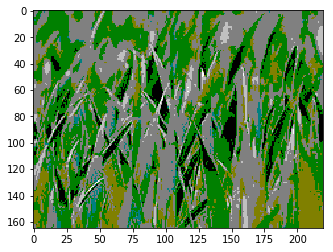

image 1
{'Black': 12511, 'Grey': 161486, 'Green': 118747, 'Olive': 216448, 'Yellow': 2, 'White': 49, 'Silver': 37957}
[(1, 0.0802696261504533), (2, 0.919729753180241)]


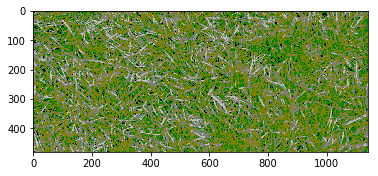

image 2
{'Black': 4932, 'Grey': 305887, 'Lime': 13287, 'Green': 725063, 'Olive': 605920, 'Yellow': 418, 'Teal': 259, 'White': 577, 'Silver': 107657}
[(1, 0.012973773132328482), (2, 0.9870260373387114)]


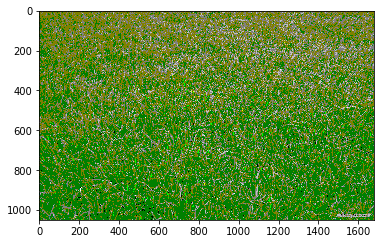

image 3
{'White': 6417, 'Black': 18124, 'Grey': 561458, 'Teal': 2, 'Olive': 854203, 'Maroon': 59, 'Silver': 92578, 'Green': 154659}
[(1, 0.07646728254732965), (2, 0.9235325177242066)]


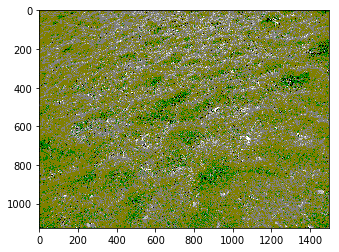

image 4
{'Black': 3617, 'Grey': 15042, 'Teal': 2, 'Olive': 34426, 'Yellow': 97, 'Green': 32069, 'White': 167, 'Silver': 4580}
[(2, 0.9987649037515538)]


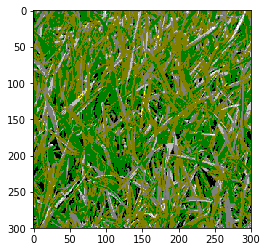

image 5
{'Black': 44092, 'Red': 9540, 'Grey': 50, 'Yellow': 5934, 'Maroon': 96692, 'Olive': 23687, 'Purple': 1, 'White': 3200, 'Silver': 554}
[(0, 0.8683392944741551), (2, 0.13165873972962455)]


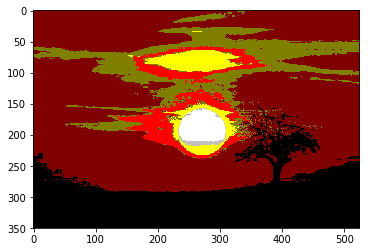

image 6
{'Navy': 2, 'Red': 2843452, 'Purple': 90, 'Maroon': 4368842, 'Olive': 198927, 'White': 1525, 'Black': 35523, 'Grey': 4103, 'Teal': 7, 'Silver': 1165, 'Yellow': 840763, 'Green': 1}
[(0, 0.99265036435405)]


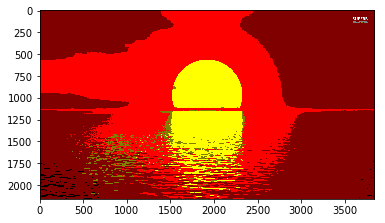

image 7
{'Black': 47016, 'Red': 76942, 'Grey': 12, 'Maroon': 206953, 'Olive': 78245, 'Yellow': 55729, 'White': 4660, 'Silver': 843}
[(0, 0.8236966019744469), (2, 0.17630266481782056)]


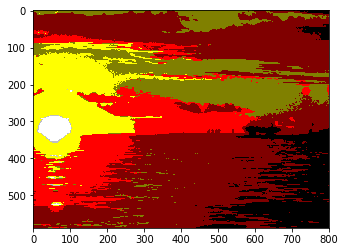

image 8
{'Black': 2076598, 'Red': 1089228, 'Maroon': 2556796, 'Olive': 5089, 'Yellow': 250462, 'White': 36906, 'Silver': 921}
[(0, 0.999999878008559)]


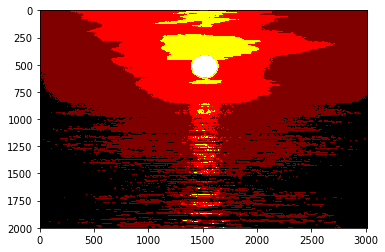

image 9
{'Black': 142213, 'Red': 319843, 'Grey': 2325, 'Yellow': 240879, 'Maroon': 230744, 'Olive': 627104, 'Purple': 5, 'White': 14528, 'Silver': 1367}
[(0, 0.5321203953223653), (2, 0.46787939039335774)]


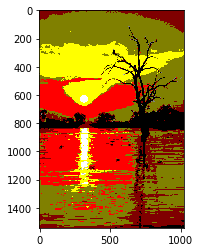

image 10
{'White': 130782, 'Teal': 389380, 'Cyan': 2501, 'Grey': 563849, 'Silver': 987088}
[(1, 0.9999996738988273)]


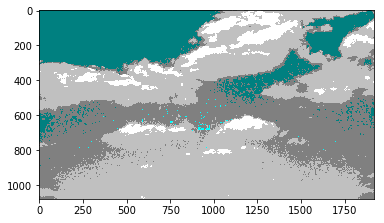

image 11
{'White': 13929, 'Cyan': 2, 'Grey': 68983, 'Teal': 61306, 'Navy': 739, 'Silver': 92497}
[(1, 0.9999971530658779)]


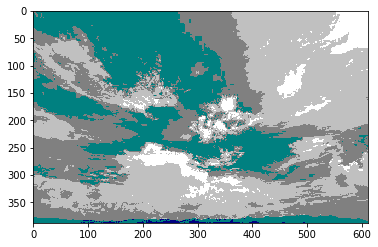

image 12
{'White': 3252, 'Teal': 12557, 'Navy': 3, 'Grey': 15822, 'Silver': 18691}
[(1, 0.999986555472585)]


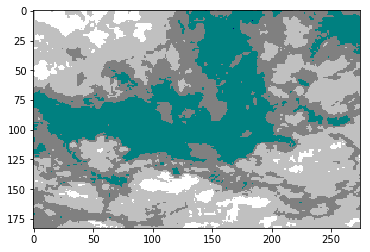

image 13
{'White': 6065, 'Teal': 18921, 'Cyan': 804, 'Grey': 8011, 'Silver': 16613}
[(1, 0.9999865693068392)]


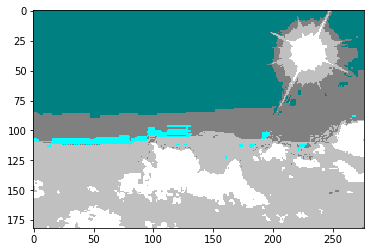

image 14
{'White': 3, 'Teal': 670959, 'Navy': 1, 'Grey': 999233, 'Silver': 772044}
[(1, 0.9999997224003421)]


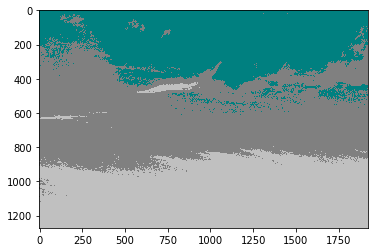

image 15
{'Green': 20351, 'White': 13001, 'Black': 2585, 'Cyan': 8, 'Grey': 16719, 'Teal': 5378, 'Navy': 6, 'Olive': 95556, 'Purple': 3, 'Maroon': 19, 'Silver': 72294}
[(1, 0.39618643571149303), (2, 0.6038120588457729)]


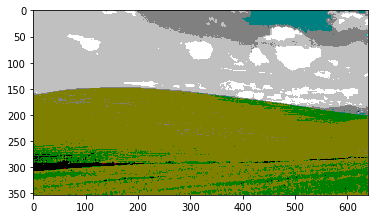

image 16
{'Green': 16919, 'Black': 30985, 'Grey': 167458, 'Teal': 162996, 'Maroon': 1031, 'Olive': 407304, 'Yellow': 9503, 'Navy': 38536, 'White': 49556, 'Silver': 164800}
[(1, 0.4636768007329631), (2, 0.5363228317732347)]


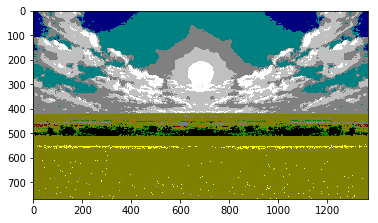

image 17
{'Black': 74164, 'Cyan': 111441, 'Grey': 47749, 'Teal': 525071, 'Olive': 488603, 'Yellow': 281425, 'Green': 223585, 'White': 133166, 'Silver': 188396}
[(1, 0.4072043212324035), (2, 0.5927954989433261)]


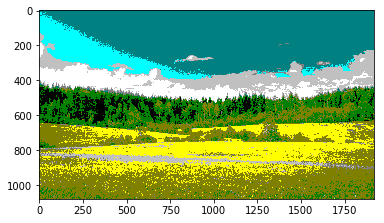

image 18
{'Grey': 249020, 'Purple': 1, 'Green': 8763, 'Olive': 468693, 'Teal': 76351, 'Silver': 297608, 'Black': 64526, 'Red': 5515, 'Maroon': 68119, 'Navy': 7671, 'Yellow': 22317, 'White': 11416}
[(0, 0.08172166256313436), (1, 0.403636378329937), (2, 0.5146419591069286)]


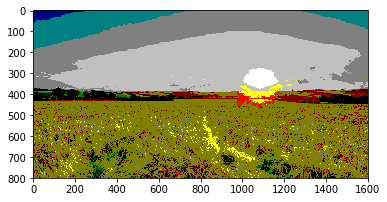

image 19
{'Black': 56669, 'Olive': 117977, 'Grey': 222631, 'Yellow': 16490, 'Maroon': 995, 'Navy': 18871, 'Green': 14106, 'Purple': 1368, 'Teal': 24300, 'White': 269, 'Silver': 104124}
[(0, 0.012982115599636499), (1, 0.5125893798420689), (2, 0.4744285045582946)]


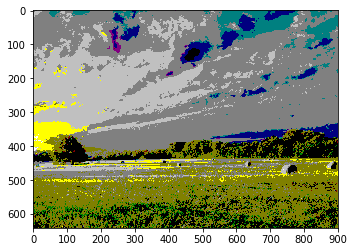

In [13]:
for i in range(20):
    print('image', i)
    print(corpus[i])
    print(ldamodel[bow_docs[i]])
    plt.imshow(plt.imread('./images/%d.bmp'%i))
    plt.show()

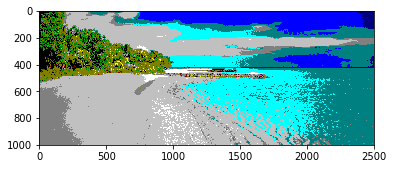

In [14]:
plt.imshow(plt.imread('./test.bmp'))

In [15]:
test_doc = get_doc('./test.bmp')
print(test_doc)

test_bow = doc_to_bow(test_doc)
print(test_bow)

{'Cyan': 365973, 'Yellow': 5193, 'Maroon': 6101, 'Olive': 123025, 'White': 41728, 'Silver': 885600, 'Black': 68773, 'Blue': 228819, 'Grey': 204012, 'Navy': 15172, 'Purple': 108, 'Teal': 487400, 'Green': 68096}
[(15, 365973), (2, 5193), (11, 6101), (4, 123025), (14, 41728), (5, 885600), (6, 68773), (8, 228819), (1, 204012), (0, 15172), (13, 108), (12, 487400), (3, 68096)]


In [16]:
ldamodel[test_bow]

[(1, 0.781078990785695), (2, 0.21561554406764086)]